# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.7718551235924505, performing 34.7 it/sec
Step 100: Loss = 1.0661388494626953, performing 185.6 it/sec
Step 200: Loss = 0.6782773651553722, performing 236.7 it/sec
Step 300: Loss = 0.4570822616382187, performing 321.9 it/sec
Step 400: Loss = 0.2553679987787377, performing 316.8 it/sec
Step 500: Loss = 0.0880823660126038, performing 311.6 it/sec
Step 600: Loss = 0.0170719733900007, performing 470.9 it/sec
No improvement since Step 553, early stopping.
[Best]  Step 552: Loss = 0.0137756037501153
[Final] Step 602: Loss = 0.0230358887422886

predicted end states
-------------------------------------
          5th       Mean      95th
OCSP-1   3.24e-02  3.24e-02  3.24e-02
OCSP-2   2.72e-10  2.77e-10  2.82e-10
OCSP-3   5.96e-04  5.96e-04  5.96e-04
OCSP-4   1.04e-11  1.05e-11  1.06e-11
OCSP-5   1.92e-11  1.94e-11  1.94e-11
OCSP-6   7.76e

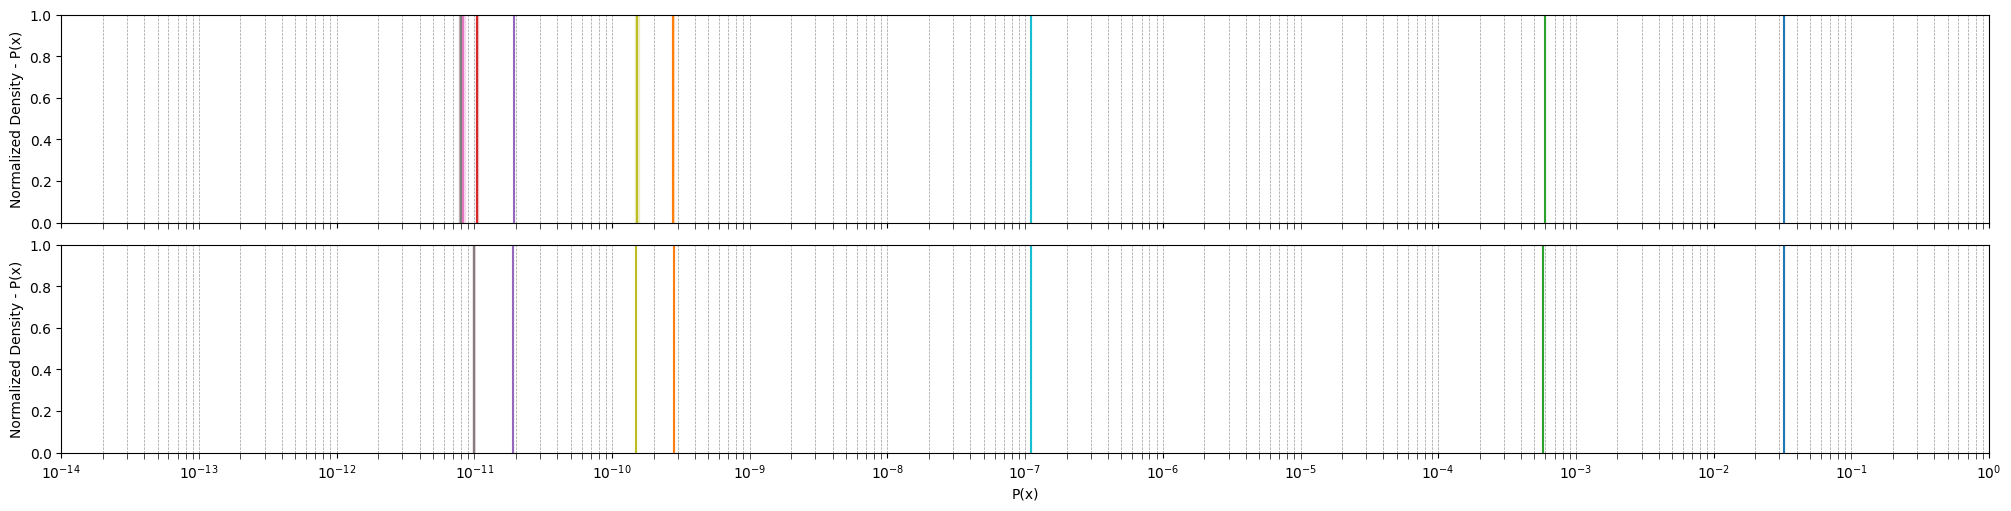

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve,
 'initiating_event_frequency': 3.3e-2,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['OCSP', 'RSIG', 'RROD', 'SPTR', 'BPHR', 'DHRS|BPHR', 'DHRS|~SPTR', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR', 'DHRL|~DHRS|~SPTR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'OCSP-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan],
        'probability': 3.24e-2,
    },
    'OCSP-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan],
        'probability': 2.80e-10,
    },
    'OCSP-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 0, np.nan],
        'probability': 5.81e-4,
    },
    'OCSP-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 1, np.nan],
        'probability': 1.0e-11,
    },
    'OCSP-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.9e-11,
    },
    'OCSP-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 0],
        'probability': 1.0e-11,
    },
    'OCSP-7': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 1],
        'probability': 1.0e-11,
    },
    'OCSP-8': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan],
        'probability': 1.0e-11,
    },

    'OCSP-9': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.5e-10,
    },

    'OCSP-10': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.10e-7,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)